In [1]:
import numpy as np
import pandas as pd
import glob
from model.ctabgan import CTAB_XTRA_DP
df = pd.read_csv("datasets/adult.csv")
#df = df.drop(columns=['Year','Model'])

df = df.head(2000)
#df.loc[:7, 'capital-gain'] = np.nan
df.head(20)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,15,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,15,4,0,3,4,0,0,0,30,39,0
5,34,4,198693,0,4,8,1,4,1,0,0,30,39,0
6,29,0,227026,11,4,0,4,2,1,0,0,40,39,0
7,63,6,104626,14,2,10,0,4,1,3103,0,32,39,1
8,24,4,369667,15,4,8,4,4,0,0,0,40,39,0
9,55,4,104996,5,2,3,0,4,1,0,0,10,39,0


In [2]:
from model.eval.gower_mix import gower_distance

a = df.iloc[:len(df)//2]
b = df.iloc[len(df)//2:]

dist2 = gower_distance(a,b)

dist2

array([[0.27738385, 0.40329847, 0.19801979, ..., 0.16873883, 0.2412449 ,
        0.15997083],
       [0.28560589, 0.31308168, 0.20624183, ..., 0.1251975 , 0.07140357,
        0.09237172],
       [0.34200008, 0.33664142, 0.28328155, ..., 0.19391851, 0.23173071,
        0.21644303],
       ...,
       [0.23673053, 0.35211505, 0.11927123, ..., 0.15701119, 0.09922324,
        0.03395748],
       [0.32580228, 0.35128431, 0.24643822, ..., 0.11573403, 0.10768607,
        0.10388436],
       [0.29905222, 0.39319472, 0.21968815, ..., 0.148431  , 0.1739983 ,
        0.09034794]])

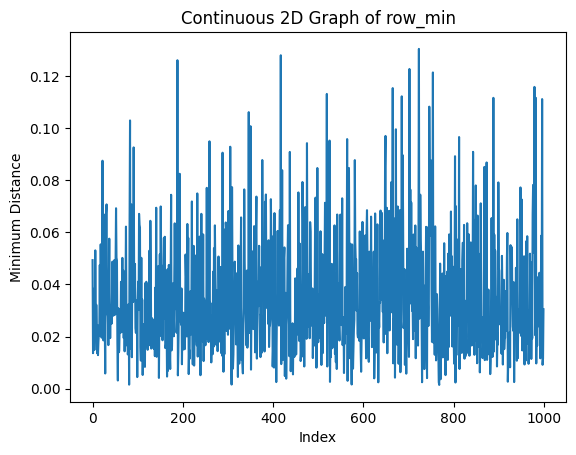

In [3]:
import seaborn as sns

import matplotlib.pyplot as plt

row_min = dist2.min(axis=1)


plt.plot(row_min)
plt.title("Continuous 2D Graph of row_min")
plt.xlabel("Index")
plt.ylabel("Minimum Distance")
plt.show()

In [4]:
min_index = np.unravel_index(np.argmin(dist2), dist2.shape)
min_index



(np.int64(768), np.int64(607))

In [5]:
a.iloc[min_index[0]],

(age                  20
 workclass             0
 fnlwgt            55263
 education            15
 marital-status        4
 occupation            0
 relationship          3
 race                  4
 gender                1
 capital-gain          0
 capital-loss          0
 hours-per-week       40
 native-country       39
 income                0
 Name: 768, dtype: int64,)

In [6]:
b.iloc[min_index[1]]

age                  20
workclass             0
fnlwgt            68620
education            15
marital-status        4
occupation            0
relationship          3
race                  4
gender                1
capital-gain          0
capital-loss          0
hours-per-week       40
native-country       39
income                0
Name: 1607, dtype: int64

In [7]:
from model.eval.evaluation2 import privacy_metrics

privacy = privacy_metrics(a,b)

==== Privacy Metrics Analysis ====
Using 15% of data for analysis
Real data sample size: 150
Fake data sample size: 150

Calculating pairwise distances...

== Nearest Neighbor Ratio Metrics (5th percentile) ==
Real-to-Real NN Ratio (5th): 0.4551
Fake-to-Fake NN Ratio (5th): 0.3583
Real-to-Fake NN Ratio (5th): 0.3981

== Minimum Distance Metrics (5th percentile) ==
Real-to-Fake Min Distance (5th): 0.0173
Real-to-Real Min Distance (5th): 0.0211
Fake-to-Fake Min Distance (5th): 0.0151

Privacy Risk Score: 0.9569
(Higher score indicates better privacy protection)

==== Summary Interpretation ====
⚠ Synthetic records may be too similar to real data
⚠ Neighbor distance ratios indicate possible privacy concerns
